In [1]:
# limit for 2 tag
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
import os
from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()

print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [3]:
limitTrees =OrderedDict()
dataCards = OrderedDict()

limitTrees_obs =OrderedDict()
dataCards_obs = OrderedDict()
limitTrees_hybridNew = OrderedDict()

version = '/V1p17/v2/v181/'
dc_version = 'v16'

nrechit = 100

mode = 'allProd_withggZH'


samples = [
'allProd_withggZH_HToSS_SToEE_ms0p4',
'allProd_withggZH_HToSS_SToGammaGamma_ms0p4',
'allProd_withggZH_HToSS_SToKPlusKMinus_ms1p5',
'allProd_withggZH_HToSS_SToK0K0_ms1p5',
'allProd_withggZH_HToSS_SToPi0Pi0_ms0p4',
'allProd_withggZH_HToSS_SToPi0Pi0_ms1p0',
'allProd_withggZH_HToSS_SToPiPlusPiMinus_ms0p4',
'allProd_withggZH_HToSS_SToPiPlusPiMinus_ms1p0',
'allProd_withggZH_HToSS_STodd_ms3p0',
'allProd_withggZH_HToSS_STodd_ms7',
'allProd_withggZH_HToSS_STodd_ms15',
'allProd_withggZH_HToSS_STodd_ms40',
'allProd_withggZH_HToSS_STodd_ms55',
'allProd_withggZH_HToSS_SToTauTau_ms7',
'allProd_withggZH_HToSS_SToTauTau_ms15',
'allProd_withggZH_HToSS_SToTauTau_ms40',
'allProd_withggZH_HToSS_SToTauTau_ms55',
'allProd_withggZH_HToSS_SToBB_ms15',
'allProd_withggZH_HToSS_SToBB_ms40',
'allProd_withggZH_HToSS_SToBB_ms55'
]





methodA = False
unblind = 'unblindABC'
hybridNew = 0
category = '/all_cat/'
limitDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees_2tag/'+version+'/'+dc_version+'/'
dataCardDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards_2tag/'+version+'/'+dc_version+'/'
hybridNewDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/hybridNew/'+version+'/'+dc_version+'/'


lumi = 137000
nCsc = 100
nDt = 80
ctaus = np.array([1,2,3,4,5, 10, 15, 20, 30, 40, 50, 60, 100, 125, 200, 300, 500, 600,700,800, \
                  1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, \
                  10000, 20000, 30000, 50000, 60000, 70000, 80000, 90000,
                  100000,200000, 300000, 500000, 600000, 700000, 800000, 900000,\
                        int(1e6), int(2e6),int(3e6),int(5e6)]) #v12

# ctaus = np.array([5, 10, 15, 20, 30, 40, 50, 60, 100, 125, 200, 300, 500, 600,700,800, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 10000, 20000, 30000, 100000,int(2e5),int(3e5),\
#                         int(2e6),int(3e6),int(5e6),int(1e7)]) #v12



### limit branch: 2.5, 16.0, 50.0, 84.0, 97.5, obs
expected = ['0.025', '0.160','0.500','0.840','0.975']


for m in samples:
    limitTrees[m] = {}
    dataCards[m] = {}
    limitTrees_hybridNew[m] = {}
    for ct in ctaus:
#         dataCards[m][ct] = dataCardDir + '/'+unblind+category+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+'.txt'
#         if unblind=='unblind':limitTrees[m][ct] = limitDir + '/'+unblind+'/obs/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+'.AsymptoticLimits.mH120.root'
#         else:limitTrees[m][ct] = limitDir + '/'+unblind+category+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+'.AsymptoticLimits.mH120.root'
#         if hybridNew:
#             limitTrees[m][ct] = []
#             for i in range(6):
#                 if i == 5:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ dphi+'.T2000.HybridNew.mH120.root')
#                 else:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nrechit)+ dphi+'.T2000.HybridNew.mH120.quant'+expected[i]+'.root')

#         dataCards[m][ct] = dataCardDir + '/'+unblind+category+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.txt'
        dataCards[m][ct] = dataCardDir + '/'+unblind+category+m+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.txt'
        limitTrees[m][ct] = limitDir + '/'+unblind+category+'/higgsCombine.'+m+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.AsymptoticLimits.mH120.root'

#         if unblind=='unblind':limitTrees[m][ct] = limitDir + '/'+unblind+'/obs/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.AsymptoticLimits.mH120.root'
#         else:limitTrees[m][ct] = limitDir + '/'+unblind+category+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+'.AsymptoticLimits.mH120.root'
        if hybridNew:
            limitTrees[m][ct] = []
            for i in range(6):
                if i == 5:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+ dphi+'.T2000.HybridNew.mH120.root')
                else:limitTrees[m][ct].append(hybridNewDir +'/'+unblind+'/higgsCombine.'+name+'_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nCsc'+ str(nCsc)+'_nDt'+str(nDt)+ dphi+'.T2000.HybridNew.mH120.quant'+expected[i]+'.root')


norms = []
limits = {}
for i,m in enumerate(limitTrees.keys()):
    if unblind == 'blind' or unblind == 'unblindABC': limits[m] = np.ones((len(ctaus), 5))*1000000
    else:limits[m] = np.ones((len(ctaus), 5))*1000000
    for j, k in enumerate(limitTrees[m].keys()):
#         if not os.path.isfile(dataCards[m][k]):continue

        if not os.path.isfile(limitTrees[m][k]):
            print(limitTrees[m][k])
            continue
        if not os.path.isfile(dataCards[m][k]):
            print(dataCards[m][k])
            continue
        
        line = open(dataCards[m][k], "r").readline()
        if not line.split(" ")[0] == '#' :continue
        signal_norm = float(line.split(" ")[3])
        
        if signal_norm == 0:continue
        if hybridNew:
            for n in range(6):
                if len(uproot.open(limitTrees[m][k][n]).keys()) == 2:
                    T = uproot.open(limitTrees[m][k][n])['limit']
                    if len(np.array(T.array('limit'))>0):limits[m][j][n] = np.array(T.array('limit'))/signal_norm
        else:
            if len(uproot.open(limitTrees[m][k]).keys()) == 2:
                T = uproot.open(limitTrees[m][k])['limit']                
                if len(np.array(T.array('limit'))>0):limits[m][j] = np.array(T.array('limit'))/signal_norm
    limits[m] = np.array(limits[m])
print(ctaus)

/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees_2tag//V1p17/v2/v181//v16//unblindABC/all_cat//higgsCombine.allProd_withggZH_HToSS_STodd_ms7_ctau100000mm_nCsc100_nDt80.AsymptoticLimits.mH120.root
/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees_2tag//V1p17/v2/v181//v16//unblindABC/all_cat//higgsCombine.allProd_withggZH_HToSS_STodd_ms7_ctau200000mm_nCsc100_nDt80.AsymptoticLimits.mH120.root
/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees_2tag//V1p17/v2/v181//v16//unblindABC/all_cat//higgsCombine.allProd_withggZH_HToSS_STodd_ms7_ctau300000mm_nCsc100_nDt80.AsymptoticLimits.mH120.root
/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees_2tag//V1p17/v2/v181//v16//unblindABC/all_cat//higgsCombine.allProd_withggZH_HToSS_STodd_ms7_ctau500000m

# load other limit

In [29]:
file_dir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/data/limits_others/'
ms1_40 = file_dir + 'atlas_mh125_mx40_ms1.csv'
ms2_40 = file_dir + 'atlas_mh125_mx40_ms2.csv'
id55 = file_dir + 'atlas_mh125_mx55_id.csv'
comb40 = file_dir + 'atlas_mh125_mx40_id_cr_ms2.csv'

exo_19_021_bb55 = file_dir + 'exo-19-021_bb_55.csv'
exo_19_021_bb40 = file_dir + 'exo-19-021_bb_40.csv'
exo_19_021_dd55 = file_dir + 'exo-19-021_dd_55.csv'
exo_19_021_dd40 = file_dir + 'exo-19-021_dd_40.csv'
exo_19_021_dd15 = file_dir + 'exo-19-021_dd_15.csv'


# took from paper draft v5
exo_20_003_bb55 = file_dir + 'exo-20-003_bb_55.csv'
exo_20_003_bb40 = file_dir + 'exo-20-003_bb_40.csv'
exo_20_003_bb15 = file_dir + 'exo-20-003_bb_15.csv'
exo_20_003_dd55 = file_dir + 'exo-20-003_dd_55.csv'
exo_20_003_dd40 = file_dir + 'exo-20-003_dd_40.csv'
exo_20_003_dd15 = file_dir + 'exo-20-003_dd_15.csv'


ms_40 = file_dir + 'atlas_mh125_mx40_ms.csv'
ms_15 = file_dir + 'atlas_mh125_mx15_ms.csv'
ms_8 = file_dir + 'atlas_mh125_mx8_ms.csv'


other_limits = {}

other_limits['atlas_ms_40'] = np.genfromtxt(ms_40, delimiter=',')
other_limits['atlas_ms_15'] = np.genfromtxt(ms_15, delimiter=',')
other_limits['atlas_ms_8'] = np.genfromtxt(ms_8, delimiter=',')


# 'ms1_40' = np.genfromtxt(ms1_40, delimiter=',')
# 'ms2_40' = np.genfromtxt(ms2_40, delimiter=',')
# 'id55' = np.genfromtxt(id55, delimiter=',')
# 'comb40' = np.genfromtxt(comb40, delimiter=',')
other_limits['exo_19_021_bb55'] = np.genfromtxt(exo_19_021_bb55, delimiter=',')
other_limits['exo_19_021_bb40'] = np.genfromtxt(exo_19_021_bb40, delimiter=',')
other_limits['exo_19_021_dd55'] = np.genfromtxt(exo_19_021_dd55, delimiter=',')
other_limits['exo_19_021_dd40'] = np.genfromtxt(exo_19_021_dd40, delimiter=',')
other_limits['exo_19_021_dd15'] = np.genfromtxt(exo_19_021_dd15, delimiter=',')

# other_limits['exo_20_003_bb55'] = np.genfromtxt(exo_20_003_bb55, delimiter=',')
# other_limits['exo_20_003_bb40'] = np.genfromtxt(exo_20_003_bb40, delimiter=',')
other_limits['exo_20_003_bb15'] = np.genfromtxt(exo_20_003_bb15, delimiter=',')
# other_limits['exo_20_003_dd55'] = np.genfromtxt(exo_20_003_dd55, delimiter=',')
# other_limits['exo_20_003_dd40'] = np.genfromtxt(exo_20_003_dd40, delimiter=',')
# other_limits['exo_20_003_dd15'] = np.genfromtxt(exo_20_003_dd15, delimiter=',')





# Expected Limit only (blinded)

EE
138 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits//V1p17/v2/v181//v16/unblindABC/allProd_withggZH_HToSSToEE_expected.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits//V1p17/v2/v181//v16/unblindABC/allProd_withggZH_HToSSToEE_expected.C has been generated
Info in <TCanvas::Print>: pdf file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits//V1p17/v2/v181//v16/unblindABC/allProd_withggZH_HToSSToEE_expected.pdf has been created


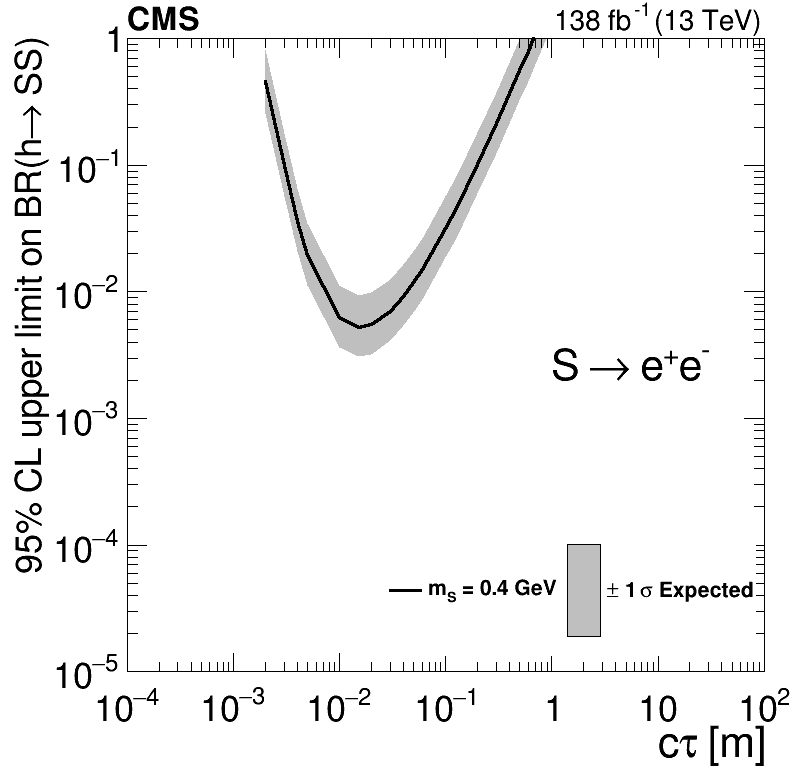

In [7]:
import os
import importlib
importlib.reload(sys.modules['CMS_lumi'])


decays =['EE', 'GammaGamma', 'KPlusKMinus', 'K0K0', 'Pi0Pi0', 'PiPlusPiMinus', 'dd', 'TauTau', 'BB']

opac_1sig = 0.25
opac_2sig = 0.1
for decay in decays:
    if not decay == 'EE':continue
    print(decay)
    leg = rt.TLegend(0.48,0.15,0.95,0.32)
    leg2 = rt.TLegend(0.18,0.17,0.40,0.30)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    leg2.SetTextSize(0.032)
    leg2.SetBorderSize(0)
    leg2.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)
    c.SetRightMargin(0.04)

    rt.gStyle.SetOptFit(1011)
    ctaus_m = ctaus/1000
#     print(ctaus_m)
    h = {}
    h_exp1sig = {}
    h_exp2sig = {}
    h_obs = {}
    h_others = {}
    sample_temp = []
    for m in samples:
        if decay in m:sample_temp.append(m)
#         elif 'K' in m:sample_temp.append(m)
    for i, m in enumerate(sample_temp):
        cond = limits[m][:,2] < 1000000
        
#         print(ctaus_m[cond])
#         print(m, ctaus_m[cond][np.argmin(limits[m][:,2][cond])], np.min(limits[m][:,2][cond]))
        if decay == 'EE':
            cond = np.logical_and(cond, np.logical_not(ctaus_m==0.001))
        if decay == 'Pi0Pi0':cond = np.logical_and(cond, np.logical_not(ctaus_m==0.125))
        if decay == 'PiPlusPiMinus':
            cond = np.logical_and(cond, np.logical_not(ctaus_m==0.003))
            cond = np.logical_and(cond, np.logical_not(ctaus_m==0.002))
        if decay == 'TauTau' or decay =='BB':
            cond = np.logical_and(cond, np.logical_not(ctaus_m==90))
            cond = np.logical_and(cond, np.logical_not(ctaus_m==80))
            cond = np.logical_and(cond, np.logical_not(ctaus_m==70))
            cond = np.logical_and(cond, np.logical_not(ctaus_m==60))
        if decay == 'dd':
            cond = np.logical_and(cond, np.logical_not(ctaus_m==8))
            cond = np.logical_and(cond, np.logical_not(ctaus_m==9))
            cond = np.logical_and(cond, np.logical_not(ctaus_m==7))

        h[m] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL upper limit on BR(h#rightarrow SS)'])
        h_exp1sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,1][cond], np.flip(limits[m][:,3][cond]))))
        mass_str = m[m.find('ms')+2:].replace('p','.')
        if float(mass_str)>=1:mass_str = str(int(float(mass_str)))
            
#         h[m] = create_TGraph(ctaus_m[cond]/float(mass_str)*0.4, limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL upper limit on BR(h#rightarrow SS)'])
#         h_exp1sig[m] = create_TGraph(np.hstack((ctaus_m[cond]/float(mass_str)*0.4, np.flip(ctaus_m[cond]/float(mass_str)*0.4))), np.hstack((limits[m][:,1][cond], np.flip(limits[m][:,3][cond]))))
        leg.AddEntry(h[m], "m_{S} = "+mass_str+" GeV", "L")
        if leg2.GetNRows() == 0:leg2.AddEntry(h[m], "Median Expected", "L")

        leg.AddEntry(h_exp1sig[m], "#pm 1 #sigma Expected", 'F')

#         if len(sample_temp) == 3: 
        h_exp1sig[m].SetFillColorAlpha(std_color_list[i],opac_1sig)
        h[m].SetLineColor(std_color_list[i])
        h[m].SetMarkerColor(std_color_list[i])

#         else: 
#             if i == 0:
#                 h_exp1sig[m].SetFillColorAlpha(std_color_list[3], opac_1sig)
#                 h[m].SetLineColor(std_color_list[3])
#             else: 
#                 h_exp1sig[m].SetFillColorAlpha(std_color_list[i-1],opac_1sig)
#                 h[m].SetLineColor(std_color_list[i-1])
        h[m].SetLineWidth(3)

        h[m].SetLineStyle(1)
        h[m].SetLineWidth(3)
        if decay == 'dd' or decay == 'BB' or decay == 'TauTau': h[m].GetXaxis().SetLimits(0.01,10000.0)
        else: h[m].GetXaxis().SetLimits(0.0001,100.0)
#         h[m].GetYaxis().SetRangeUser(1e-4,1)
        h[m].GetYaxis().SetRangeUser(1e-5,1)

        h[m].GetXaxis().SetTitleOffset(1)
        h[m].GetYaxis().SetTitleSize(0.05)
        h[m].GetYaxis().SetTitleOffset(1.5)



    for i,m in enumerate(h.keys()):
        h[m].Draw('LA' if i == 0 else 'Lsame')
#         h_obs[m].Draw('LPsame')
        h_exp1sig[m].Draw('Fsame')



    tdrstyle.setTDRStyle()
    CMS_lumi.cmsText     = "CMS"
    iPos = 0
    CMS_lumi.writeExtraText = 0
    CMS_lumi.extraText   = "Preliminary"

    if( iPos==0 ): CMS_lumi.relPosX = 0.12
    # CMS_lumi.CMS_lumi(c, 4, 0)
    CMS_lumi.CMS_lumi(c, 4, iPos)


    leg.SetNColumns(2)

    leg.Draw()
#     leg2.Draw()
    c.SetLogy()
    c.SetLogx()
    c.SetTicky(1)
    c.SetTickx(1)


    latex = rt.TLatex()
    latex.SetTextSize(0.06)
    latex.SetTextFont(42)

    if decay == 'dd': latex.DrawLatex(200,0.002,  "S #rightarrow d#bar{d}")
    elif decay == 'BB': latex.DrawLatex(200,0.002, "S #rightarrow b#bar{b}")
    elif decay == 'TauTau': latex.DrawLatex(200,0.002, "S #rightarrow #tau^{+}#tau^{-}")
    elif decay == 'EE': latex.DrawLatex(1,0.002, "S #rightarrow e^{+}e^{-}")
    elif decay == 'GammaGamma': latex.DrawLatex(1,0.002, "S #rightarrow #gamma#gamma")
    elif decay == 'KPlusKMinus': latex.DrawLatex(1,0.002, "S #rightarrow K^{+}K^{-}")
    elif decay == 'K0K0': latex.DrawLatex(1,0.002, "S #rightarrow K^{0}K^{0}")
    elif decay == 'Pi0Pi0': latex.DrawLatex(1,0.002, "S #rightarrow #pi^{0}#pi^{0}")
    elif decay == 'PiPlusPiMinus': latex.DrawLatex(1,0.002, "S #rightarrow #pi^{+}#pi^{-}")

    output_dir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits/'+version+'/'+dc_version+'/'+unblind+'/'
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    name = output_dir+mode+'_HToSSTo'+decay


    c.SaveAs(name+'_expected.png')
    c.SaveAs(name+'_expected.C')
    c.SaveAs(name+'_expected.pdf')

    tdrstyle.setTDRStyle()
    c.Draw()


In [60]:
limits['allProd_withggZH_HToSS_SToTauTau_ms40'][:,2]

array([1.00000000e+06, 1.00000000e+06, 2.27827426e+40, 3.61162115e+30,
       2.67530152e+24, 2.97527788e+11, 1.00000000e+06, 3.29057382e+01,
       2.23579863e+01, 1.44417530e+01, 7.32509091e+00, 4.00427265e+00,
       7.65672009e-01, 5.02618635e-01, 1.23750435e-01, 3.19432720e-02,
       7.16443813e-03, 4.87179204e-03, 3.73232633e-03, 3.10259072e-03,
       2.49438089e-03, 2.25408380e-03, 2.89022498e-03, 3.78709344e-03,
       4.90966856e-03, 6.19302928e-03, 7.60859303e-03, 9.21589856e-03,
       1.13542940e-02, 3.63745053e-02, 7.51305316e-02, 1.83819611e-01,
       2.50430363e-01, 3.22706656e-01, 4.01537737e-01, 4.83798859e-01,
       7.91378018e-01, 1.92724088e+00, 3.11313528e+00, 5.53845103e+00,
       1.00000000e+06, 1.00000000e+06, 1.00000000e+06, 1.00000000e+06,
       1.15842222e+01, 2.33376995e+01, 3.47899332e+01, 5.70539796e+01])

In [62]:
ctaus_m

array([1.00e-03, 2.00e-03, 3.00e-03, 4.00e-03, 5.00e-03, 1.00e-02,
       1.50e-02, 2.00e-02, 3.00e-02, 4.00e-02, 5.00e-02, 6.00e-02,
       1.00e-01, 1.25e-01, 2.00e-01, 3.00e-01, 5.00e-01, 6.00e-01,
       7.00e-01, 8.00e-01, 1.00e+00, 2.00e+00, 3.00e+00, 4.00e+00,
       5.00e+00, 6.00e+00, 7.00e+00, 8.00e+00, 1.00e+01, 2.00e+01,
       3.00e+01, 5.00e+01, 6.00e+01, 7.00e+01, 8.00e+01, 9.00e+01,
       1.00e+02, 2.00e+02, 3.00e+02, 5.00e+02, 6.00e+02, 7.00e+02,
       8.00e+02, 9.00e+02, 1.00e+03, 2.00e+03, 3.00e+03, 5.00e+03])

# compare all hadronic modes

['allProd_withggZH_HToSS_SToKPlusKMinus_ms1p5', 'allProd_withggZH_HToSS_SToK0K0_ms1p5', 'allProd_withggZH_HToSS_SToPiPlusPiMinus_ms0p4', 'allProd_withggZH_HToSS_SToPiPlusPiMinus_ms1p0', 'allProd_withggZH_HToSS_STodd_ms15', 'allProd_withggZH_HToSS_SToBB_ms15']
allProd_withggZH_HToSS_SToKPlusKMinus_ms1p5
1.5
allProd_withggZH_HToSS_SToKPlusKMinus_ms1p5 1.5
allProd_withggZH_HToSS_SToKPlusKMinus_ms1p5 1.5
allProd_withggZH_HToSS_SToK0K0_ms1p5
1.5
allProd_withggZH_HToSS_SToK0K0_ms1p5 1.5
allProd_withggZH_HToSS_SToK0K0_ms1p5 1.5
allProd_withggZH_HToSS_SToPiPlusPiMinus_ms0p4
0.4
allProd_withggZH_HToSS_SToPiPlusPiMinus_ms0p4 0.4
allProd_withggZH_HToSS_SToPiPlusPiMinus_ms1p0
1.0
allProd_withggZH_HToSS_SToPiPlusPiMinus_ms1p0 1
allProd_withggZH_HToSS_STodd_ms15
15
allProd_withggZH_HToSS_STodd_ms15 15
allProd_withggZH_HToSS_SToBB_ms15
15
allProd_withggZH_HToSS_SToBB_ms15 15
137 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


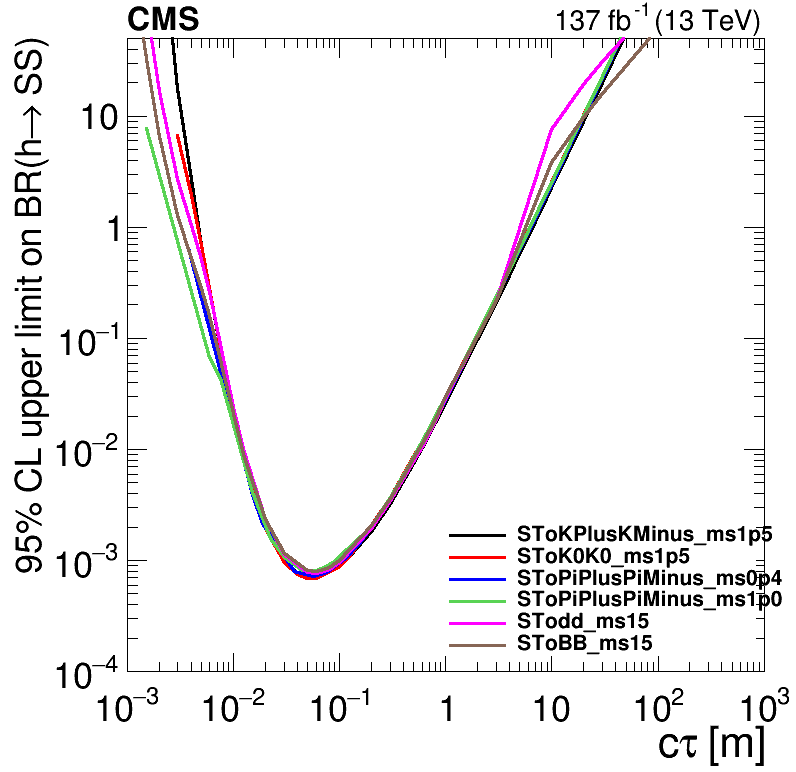

In [95]:
import os
import importlib
importlib.reload(sys.modules['CMS_lumi'])


decays =['KPlusKMinus', 'K0K0', 'PiPlusPiMinus', 'dd', 'BB']
# decays =['EE', 'GammaGamma',  'Pi0Pi0', ]


opac_1sig = 0.25
opac_2sig = 0.1

leg = rt.TLegend(0.55,0.15,0.95,0.32)
leg2 = rt.TLegend(0.18,0.17,0.40,0.30)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
leg2.SetTextSize(0.032)
leg2.SetBorderSize(0)
leg2.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
c.SetRightMargin(0.04)

rt.gStyle.SetOptFit(1011)
ctaus_m = ctaus/1000
#     print(ctaus_m)
h = {}
h_exp1sig = {}
h_exp2sig = {}
h_obs = {}
h_others = {}
sample_temp = []
for m in samples:
    for decay in decays:
        if decay in m:
            if decay == 'dd'  or decay == 'BB':
                if '15' in m:sample_temp.append(m)
                else:continue
            else: sample_temp.append(m)
            break
print(sample_temp)
for i, m in enumerate(sample_temp):
    print(m)
    cond = limits[m][:,2] < 10000

#         print(ctaus_m[cond])
    if 'EE' in m:cond = np.logical_and(cond, np.logical_not(ctaus_m==0.001))
    if 'Pi0Pi0' in m:cond = np.logical_and(cond, np.logical_not(ctaus_m==0.125))
    if 'PiPlusPiMinus'in m:
        cond = np.logical_and(cond, np.logical_not(ctaus_m==0.003))
        cond = np.logical_and(cond, np.logical_not(ctaus_m==0.002))
#     h[m] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL upper limit on BR(h#rightarrow SS)'])
#     h_exp1sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,1][cond], np.flip(limits[m][:,3][cond]))))
    mass_str = m[m.find('ms')+2:].replace('p','.')
    print(mass_str)
    if float(mass_str) == int(float(mass_str)):mass_str = str(int(float(mass_str)))
    print(m, mass_str)
    h[m] = create_TGraph(ctaus_m[cond]/float(mass_str)*1.5, limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL upper limit on BR(h#rightarrow SS)'])
    if 'K' in m:
        print(m, mass_str)
        h[m] = create_TGraph(ctaus_m[cond]/float(mass_str)*1.5, limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL upper limit on BR(h#rightarrow SS)'])
    h_exp1sig[m] = create_TGraph(np.hstack((ctaus_m[cond]/float(mass_str)*1.5, np.flip(ctaus_m[cond]/float(mass_str)*1.5))), np.hstack((limits[m][:,1][cond], np.flip(limits[m][:,3][cond]))))
    leg.AddEntry(h[m], m[m.find('STo'):], "L")


    h_exp1sig[m].SetFillColorAlpha(std_color_list[i],opac_1sig)
    h[m].SetLineColor(std_color_list[i])
    h[m].SetMarkerColor(std_color_list[i])

#         else: 
#             if i == 0:
#                 h_exp1sig[m].SetFillColorAlpha(std_color_list[3], opac_1sig)
#                 h[m].SetLineColor(std_color_list[3])
#             else: 
#                 h_exp1sig[m].SetFillColorAlpha(std_color_list[i-1],opac_1sig)
#                 h[m].SetLineColor(std_color_list[i-1])
    h[m].SetLineWidth(3)

    h[m].SetLineStyle(1)
    h[m].SetLineWidth(3)
#     if decay == 'dd' or decay == 'BB' or decay == 'TauTau': h[m].GetXaxis().SetLimits(0.01,10000.0)
    h[m].GetXaxis().SetLimits(0.001,1000.0)
    h[m].GetYaxis().SetRangeUser(1e-4,50)
#         h[m].GetYaxis().SetRangeUser(1e-5,1)

    h[m].GetXaxis().SetTitleOffset(1)
    h[m].GetYaxis().SetTitleSize(0.05)
    h[m].GetYaxis().SetTitleOffset(1.5)



for i,m in enumerate(h.keys()):
    h[m].Draw('LA' if i == 0 else 'Lsame')
#         h_obs[m].Draw('LPsame')
#     h_exp1sig[m].Draw('Fsame')



tdrstyle.setTDRStyle()
CMS_lumi.cmsText     = "CMS"
iPos = 0
CMS_lumi.writeExtraText = 0
CMS_lumi.extraText   = "Preliminary"

if( iPos==0 ): CMS_lumi.relPosX = 0.12
# CMS_lumi.CMS_lumi(c, 4, 0)
CMS_lumi.CMS_lumi(c, 4, iPos)


# leg.SetNColumns(2)

leg.Draw()
#     leg2.Draw()
c.SetLogy()
c.SetLogx()
c.SetTicky(1)
c.SetTickx(1)


latex = rt.TLatex()
latex.SetTextSize(0.06)
latex.SetTextFont(42)

# if decay == 'dd': latex.DrawLatex(200,0.002,  "S #rightarrow d#bar{d}")
# elif decay == 'BB': latex.DrawLatex(200,0.002, "S #rightarrow b#bar{b}")
# elif decay == 'TauTau': latex.DrawLatex(200,0.002, "S #rightarrow #tau^{+}#tau^{-}")
# elif decay == 'EE': latex.DrawLatex(1,0.002, "S #rightarrow e^{+}e^{-}")
# elif decay == 'GammaGamma': latex.DrawLatex(1,0.002, "S #rightarrow #gamma#gamma")
# elif decay == 'KPlusKMinus': latex.DrawLatex(1,0.002, "S #rightarrow K^{+}K^{-}")
# elif decay == 'K0K0': latex.DrawLatex(1,0.002, "S #rightarrow K^{0}K^{0}")
# elif decay == 'Pi0Pi0': latex.DrawLatex(1,0.002, "S #rightarrow #pi^{0}#pi^{0}")
# elif decay == 'PiPlusPiMinus': latex.DrawLatex(1,0.002, "S #rightarrow #pi^{+}#pi^{-}")







output_dir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/limits/'+version+'/'+dc_version+'/'+unblind+'/'
if not os.path.isdir(output_dir):os.makedirs(output_dir)
name = output_dir+mode+'_HToSSTo'+decay


#     print(name)
#     c.SaveAs(name+'_expected.png')
#     c.SaveAs(name+'_expected.C')
#     c.SaveAs(name+'_expected.pdf')

tdrstyle.setTDRStyle()
c.Draw()



# comparison with ALTAS (all masses)

[1.00e-02 2.00e-02 3.00e-02 4.00e-02 5.00e-02 6.00e-02 1.00e-01 1.25e-01
 2.00e-01 3.00e-01 5.00e-01 1.00e+00 2.00e+00 3.00e+00 5.00e+00 1.00e+01
 2.00e+01 3.00e+01 5.00e+01 1.00e+02 2.00e+02 3.00e+02 5.00e+02 2.00e+03
 3.00e+03 5.00e+03 1.00e+04]
[1.64293274e+00 7.40615243e-02 2.24172159e-02 1.03251048e-02
 7.78682162e-03 6.15564239e-03 3.79885011e-03 3.28867754e-03
 3.12748747e-03 3.15188254e-03 3.48426435e-03 4.84195866e-03
 1.05398805e-02 1.53290879e-02 2.49556759e-02 4.02231129e-02
 8.64548803e-02 1.29015818e-01 2.16607481e-01 4.90720985e-01
 9.89020722e-01 1.42625703e+00 2.44730515e+00 9.88262575e+00
 1.48374416e+01 2.49815482e+01 4.94838430e+01]
[1.66156234e+02 2.11394320e+00 2.92750342e-01 8.60138456e-02
 4.07280865e-02 2.61499038e-02 8.74400635e-03 6.59163353e-03
 3.93487028e-03 2.94255719e-03 2.94957307e-03 3.30137654e-03
 5.00057811e-03 7.17208026e-03 1.03052408e-02 1.88311577e-02
 4.08315873e-02 6.15877395e-02 1.05982965e-01 2.19126878e-01
 4.23132498e-01 6.38920846e-01 1.0

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits//V1p17/v2/v106/cut_based_v4/v12/unblind/allProd_withggZH_HToSSTo4Tau_dPhiCluster0p75_nRechit130_observed_withATLAS_hybridNew.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits//V1p17/v2/v106/cut_based_v4/v12/unblind/allProd_withggZH_HToSSTo4Tau_dPhiCluster0p75_nRechit130_observed_withATLAS_hybridNew.C has been generated
Info in <TCanvas::Print>: pdf file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits//V1p17/v2/v106/cut_based_v4/v12/unblind/allProd_withggZH_HToSSTo4Tau_dPhiCluster0p75_nRechit130_observed_withATLAS_hybridNew.pdf has been created


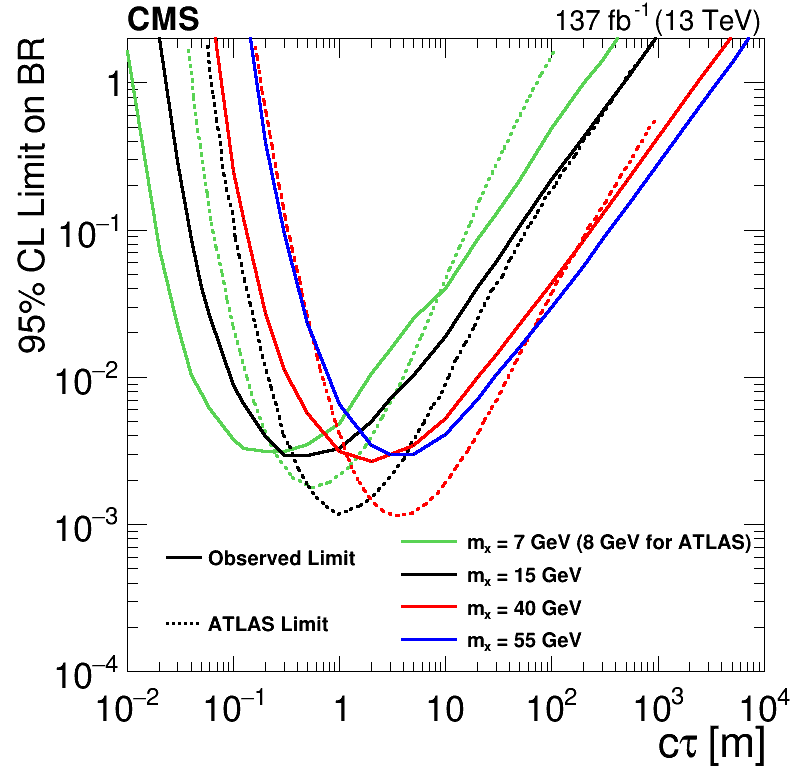

In [68]:
import os
opac_1sig = 0.25
opac_2sig = 0.1
withATLAS = 1

   


if decay == 'bbbb':
    leg = rt.TLegend(0.55,0.15,0.88,0.32)
    leg.SetTextSize(0.028)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.005)
else:
    leg = rt.TLegend(0.49,0.15,0.88,0.32)
    
    leg.SetTextSize(0.028)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.005)

leg2 = rt.TLegend(0.2,0.15,0.45,0.32)
leg2.SetTextSize(0.028)
leg2.SetBorderSize(0)
leg2.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
c.SetRightMargin(0.04)


rt.gStyle.SetOptFit(1011)
ctaus_m = ctaus/1000
print(ctaus_m)
h = {}
h_exp1sig = {}
h_exp2sig = {}
h_obs = {}
h_others = {}
upper = 1000000

if withATLAS:
    
    if not 'b' in decay: h_others[7] = create_TGraph(other_limits['atlas_ms_8'][:,0][other_limits['atlas_ms_8'][:,1]<upper],other_limits['atlas_ms_8'][:,1][other_limits['atlas_ms_8'][:,1]<upper],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
    h_others[15] = create_TGraph(other_limits['atlas_ms_15'][:,0][other_limits['atlas_ms_15'][:,1]<upper],other_limits['atlas_ms_15'][:,1][other_limits['atlas_ms_15'][:,1]<upper],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
    h_others[40] = create_TGraph(other_limits['atlas_ms_40'][:,0][other_limits['atlas_ms_40'][:,1]<upper],other_limits['atlas_ms_40'][:,1][other_limits['atlas_ms_40'][:,1]<upper],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
#         for k, v in h_others.items():
#             leg.AddEntry(h_others[k], "ATLAS MS (36 fb^{-1})", 'L')


for i, m in enumerate(mass):
    cond = limits[m][:,5] < upper
#     if m == 7 and decay == '4Tau':  
#         cond = np.logical_and(cond, np.logical_not(ctaus_m==5))
#         cond = np.logical_and(cond, np.logical_not(ctaus_m==3))
#         cond = np.logical_and(cond, np.logical_not(ctaus_m==2))
    h_obs[m] = create_TGraph(ctaus_m[cond], limits[m][:,5][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
#     print(m)
#     print(ctaus_m[cond])
    print(limits[m][:,5][cond])
    if m == 7:leg.AddEntry(h_obs[m], "m_{x} = "+str(m)+" GeV (8 GeV for ATLAS)", "L")
    else: leg.AddEntry(h_obs[m], "m_{x} = "+str(m)+" GeV", "L")
    if m == 15:
        leg2.AddEntry(h_obs[m], "Observed Limit", "LP")
        leg2.AddEntry(h_others[m], "ATLAS Limit", "L")


    if len(mass) == 3: 
        if not m == 55:h_others[m].SetLineColor(std_color_list[i])
        h_obs[m].SetLineColor(std_color_list[i])
#         h_obs[m].SetMarkerColor(std_color_list[i])


    else: 
        if i == 0:
            h_others[m].SetLineColor(std_color_list[3])
            h_obs[m].SetLineColor(std_color_list[3])
            h_obs[m].SetMarkerColor(std_color_list[3])
        else: 
            if not m == 55:h_others[m].SetLineColor(std_color_list[i-1])
            h_obs[m].SetLineColor(std_color_list[i-1])
#             h_obs[m].SetMarkerColor(std_color_list[i-1])
    h_obs[m].SetLineWidth(3)
#     h_obs[m].SetMarkerStyle(20)
#     h_obs[m].SetMarkerSize(1)
    if not m == 55:
        h_others[m].SetLineStyle(2)
        h_others[m].SetLineWidth(3)
        h_others[m].GetXaxis().SetLimits(0.01,10000.0)
#         h_others[m].GetYaxis().SetRangeUser(5e-4,100)
        h_others[m].GetYaxis().SetRangeUser(1e-4,2)


        h_others[m].GetXaxis().SetTitleOffset(1)
        h_others[m].GetYaxis().SetTitleSize(0.05)
        h_others[m].GetYaxis().SetTitleOffset(1.5)



for i,m in enumerate(h_obs.keys()):
    if not m == 55:
        h_others[m].Draw('LA' if i == 0 else 'Lsame')
    h_obs[m].Draw('LPsame')



tdrstyle.setTDRStyle()
CMS_lumi.cmsText     = "CMS"
iPos = 0
CMS_lumi.writeExtraText =0
CMS_lumi.extraText   = "Preliminary"

if( iPos==0 ): CMS_lumi.relPosX = 0.12
# CMS_lumi.CMS_lumi(c, 4, 0)
CMS_lumi.CMS_lumi(c, 4, iPos)

leg.Draw()
leg2.Draw()
c.SetLogy()
c.SetLogx()
c.SetTicky(1)
c.SetTickx(1)
output_dir = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/'+unblind+'/'
if not os.path.isdir(output_dir):os.makedirs(output_dir)
name = output_dir+mode+'_HToSSTo'+decay+'_'+dphi+'_nRechit'+str(nrechit)+'_observed_withATLAS'
if hybridNew:name += '_hybridNew'
if CMS_lumi.writeExtraText: name += "_pas"



c.SaveAs(name+'.png')
c.SaveAs(name+'.C')
c.SaveAs(name+'.pdf')

tdrstyle.setTDRStyle()
c.Draw()


# Observed Limit

[1.00e-02 2.00e-02 3.00e-02 4.00e-02 5.00e-02 6.00e-02 1.00e-01 1.25e-01
 2.00e-01 3.00e-01 5.00e-01 6.00e-01 7.00e-01 8.00e-01 1.00e+00 2.00e+00
 3.00e+00 4.00e+00 5.00e+00 6.00e+00 7.00e+00 8.00e+00 1.00e+01 2.00e+01
 3.00e+01 1.00e+02 2.00e+02 3.00e+02 2.00e+03 3.00e+03 5.00e+03 1.00e+04]
137 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits//V1p17/v2/v106/cut_based_v4/v13/unblind/allProd_withggZH_HToSSTodddd_dPhiCluster0p75_nRechit130_hybridNew_with1sig.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits//V1p17/v2/v106/cut_based_v4/v13/unblind/allProd_withggZH_HToSSTodddd_dPhiCluster0p75_nRechit130_hybridNew_with1sig.C has been generated
Info in <TCanvas::Print>: pdf file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits//V1p17/v2/v106/cut_based_v4/v13/unblind/allProd_withggZH_HToSSTodddd_dPhiCluster0p75_nRechit130_hybridNew_with1sig.pdf has been created


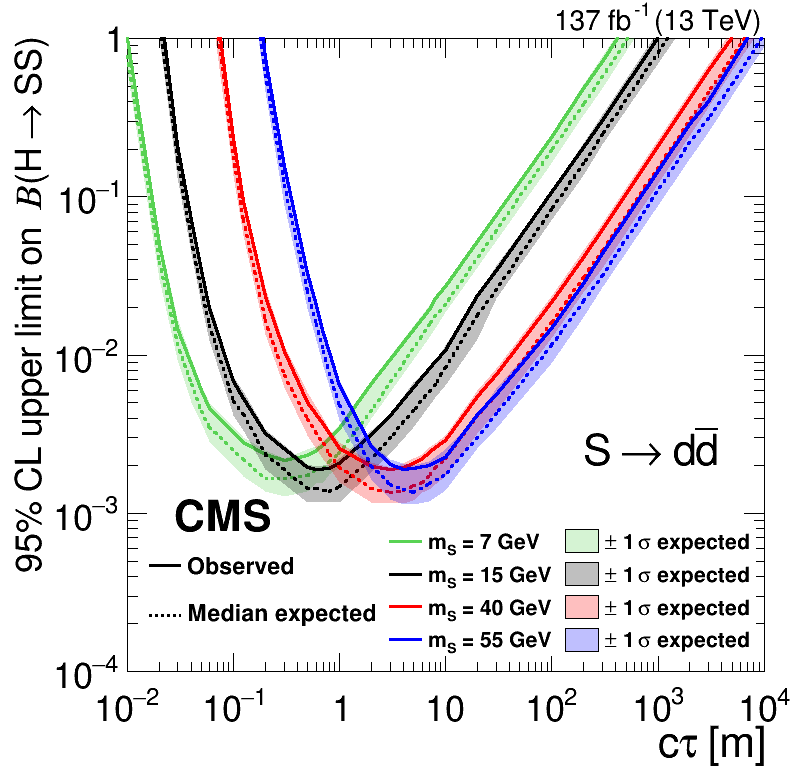

In [13]:
import os
import importlib
importlib.reload(sys.modules['CMS_lumi'])





opac_1sig = 0.25
opac_2sig = 0.15
for band in [0,1,2]:# 0 is no band, 1 is with 1sig only, 2 is with both 1sig and 2sig band
    if not band == 1:continue

    if band ==2: 
        leg = rt.TLegend(0.3,0.75,0.9,0.92)
        leg2 = rt.TLegend(0.1,0.75,0.3,0.90)
    elif band ==1: 
#         leg = rt.TLegend(0.48,0.75,0.95,0.92)
#         leg2 = rt.TLegend(0.18,0.77,0.40,0.90)
        
        leg = rt.TLegend(0.48,0.15,0.95,0.32)
        leg2 = rt.TLegend(0.18,0.17,0.40,0.30)
    else:
        leg = rt.TLegend(0.6,0.7,0.9,0.92)
        leg2 = rt.TLegend(0.2,0.7,0.45,0.92)
    
    
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
    leg2.SetTextSize(0.032)
    leg2.SetBorderSize(0)
    leg2.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)
    c.SetRightMargin(0.04)


    rt.gStyle.SetOptFit(1011)
    ctaus_m = ctaus/1000
    print(ctaus_m)
    h = {}
    h_exp1sig = {}
    h_exp2sig = {}
    h_obs = {}
    h_others = {}
   
    for i, m in enumerate(mass):
        cond = limits[m][:,2] < 50
        cond = np.logical_and(cond, limits[m][:,0] < 50)
        cond = np.logical_and(cond, limits[m][:,1] < 50)
        cond = np.logical_and(cond, limits[m][:,3] < 50)




#         if not m == 7:continue
        if decay == 'dddd':
            if m == 7:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==5))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==3))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==4))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==6))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.1))


                cond = np.logical_and(cond, np.logical_not(ctaus_m==30))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==20))



            if m == 15:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.7))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==7))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==6))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==4))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.3))
            if m == 40:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.6))


            if m == 55:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==8))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==6))


        if decay == '4Tau':
            if m == 7:
#                 cond = np.logical_and(cond, np.logical_not(ctaus_m==0.1))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.06))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.2))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.125))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.8))







                cond = np.logical_and(cond, np.logical_not(ctaus_m==2))
#                 cond = np.logical_and(cond, np.logical_not(ctaus_m==4))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==7))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==10))
            if m == 15:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.8))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.6))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==6))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==5))

#                 cond = np.logical_and(cond, np.logical_not(ctaus_m==8))

                cond = np.logical_and(cond, np.logical_not(ctaus_m==4))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==10))




            if m == 40:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==7))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==6))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==4))



            if m == 55:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==5))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==8))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==4))




                
        if decay == 'bbbb':
            if m == 15:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.5))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==8))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.8))



            if m == 40:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==0.5))

                cond = np.logical_and(cond, np.logical_not(ctaus_m==5))

                cond = np.logical_and(cond, np.logical_not(ctaus_m==10))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==7))
                
            if m == 55:
                cond = np.logical_and(cond, np.logical_not(ctaus_m==5))
                cond = np.logical_and(cond, np.logical_not(ctaus_m==4))
#                 cond = np.logical_and(cond, np.logical_not(ctaus_m==2))





#         h[m] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL upper limit on B(H  #rightarrow SS)'])
#         h_obs[m] = create_TGraph(ctaus_m[cond], limits[m][:,5][cond],  axis_title=['c#tau [m]', '95% CL upper limit on B(H #rightarrow SS)'])
    
        h[m] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL upper limit on  #bf{#it{#Beta}}(H #rightarrow SS)'])
        h_obs[m] = create_TGraph(ctaus_m[cond], limits[m][:,5][cond],  axis_title=['c#tau [m]', '95% CL upper limit on #bf{#it{#Beta}}(H #rightarrow SS)'])
    
    
    

        h_exp1sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,1][cond], np.flip(limits[m][:,3][cond]))))
        h_exp2sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,0][cond], np.flip(limits[m][:,4][cond]))))
        
        leg.AddEntry(h_obs[m], "m_{S} = "+str(m)+" GeV", "L")
        if m == 15:
            leg2.AddEntry(h_obs[m], "Observed", "LP")
            leg2.AddEntry(h[m], "Median expected", "L")
            



        if band>0: leg.AddEntry(h_exp1sig[m], "#pm 1 #sigma expected", 'F')
        if band==2: leg.AddEntry(h_exp2sig[m], "#pm 2 #sigma expected", 'F')
        
        if len(mass) == 3: 
            h_exp1sig[m].SetFillColorAlpha(std_color_list[i],opac_1sig)
            h_exp2sig[m].SetFillColorAlpha(std_color_list[i], opac_2sig)
            h[m].SetLineColor(std_color_list[i])
            h_obs[m].SetLineColor(std_color_list[i])
            h_obs[m].SetMarkerColor(std_color_list[i])


        else: 
            if i == 0:
                h_exp1sig[m].SetFillColorAlpha(std_color_list[3], opac_1sig)
                h_exp2sig[m].SetFillColorAlpha(std_color_list[3], opac_2sig)
                h[m].SetLineColor(std_color_list[3])
                h_obs[m].SetLineColor(std_color_list[3])
                h_obs[m].SetMarkerColor(std_color_list[3])
            else: 
                h_exp1sig[m].SetFillColorAlpha(std_color_list[i-1],opac_1sig)
                h_exp2sig[m].SetFillColorAlpha(std_color_list[i-1], opac_2sig)
                h[m].SetLineColor(std_color_list[i-1])
                h_obs[m].SetLineColor(std_color_list[i-1])
                h_obs[m].SetMarkerColor(std_color_list[i-1])
        h_obs[m].SetLineWidth(3)
#         h_obs[m].SetMarkerStyle(20)
#         h_obs[m].SetMarkerSize(1)

        h[m].SetLineStyle(2)
        h[m].SetLineWidth(3)
        h[m].GetXaxis().SetLimits(0.01,10000.0)
        h[m].GetYaxis().SetRangeUser(5e-4,50)
        h[m].GetYaxis().SetRangeUser(1e-4,1)

        h[m].GetXaxis().SetTitleOffset(1)
        h[m].GetYaxis().SetTitleSize(0.05)
        h[m].GetYaxis().SetTitleOffset(1.5)
#         h[m].SetTitle('95% CL upper limit on B(H #rightarrow SS)')
#         graph->SetTitle("global title;X axis title;Y axis title;Z axis title");




        ###### save to text file for hepdata ######
        outputDir = '/storage/af/user/christiw/login-1/christiw/LLP/CMSSW_9_4_4/src/llp_analyzer/data/SupplementaryMaterials/'+dc_version+'/'
#         if not os.path.isdir(outputDir):os.makedirs(outputDir)
#         outputFileName = outputDir + 'limits'+decay+'_m'+str(m)
#         if hybridNew: outputFileName += '_hybridNew'
#         outputFileName += '.txt'
#         np.savetxt(outputFileName, np.column_stack((ctaus_m[cond], limits[m][cond])), delimiter="\t")

        ###### save to ROOT file ######
#         outFile = rt.TFile(outputDir+'limits.root', 'UPDATE')
#         name = ['n2sig', 'n1sig', 'exp', 'p1sig', 'p2sig','obs']
#         outFile.WriteTObject(h[m], 'h_'+decay+'_m'+str(m)+'_exp', "WriteDelete");
#         outFile.WriteTObject(h_obs[m], 'h_'+decay+'_m'+str(m)+'_obs', "WriteDelete");


    
#         outFile.Close();
        

    for i,m in enumerate(h.keys()):
        h[m].Draw('LA' if i == 0 else 'Lsame')
        h_obs[m].Draw('LPsame')
        if band>0: h_exp1sig[m].Draw('Fsame')
        if band==2: h_exp2sig[m].Draw('Fsame')

    leg.Draw()
    leg2.Draw()

    tdrstyle.setTDRStyle()
    CMS_lumi.cmsText     = "CMS"
    
    CMS_lumi.writeExtraText = 0
    CMS_lumi.extraText   = "Supplementary"
    CMS_lumi.extraText   = "Preliminary"
    CMS_lumi.cmsTextSize      = 1.2
    
    
    
    if (CMS_lumi.writeExtraText == 0): 
        iPos = 11
        CMS_lumi.relPosX = 0.15
        CMS_lumi.relPosY = 0.73
    else:
        iPos = 0
        CMS_lumi.relPosX = 0.12
    CMS_lumi.CMS_lumi(c, 4, iPos)


    if band>0:leg.SetNColumns(2)
    if band == 2:leg.SetNColumns(3)

    
    c.SetLogy()
    c.SetLogx()
    c.SetTicky(1)
    c.SetTickx(1)
    
    
    latex = rt.TLatex()
    latex.SetTextSize(0.06)
    latex.SetTextFont(42)
        
    if decay == 'dddd': latex.DrawLatex(200,0.002,  "S #rightarrow d#bar{d}")
    elif decay == 'bbbb': latex.DrawLatex(200,0.002, "S #rightarrow b#bar{b}")
    elif decay == '4Tau': latex.DrawLatex(200,0.002, "S #rightarrow #tau^{+}#tau^{-}")





    ###### save plot #####

    output_dir = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/'+unblind+'/'
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    name = output_dir+mode+'_HToSSTo'+decay+'_'+dphi+'_nRechit'+str(nrechit)
    if hybridNew:name += '_hybridNew'
    if band==2: name += '_with2sig'
    elif band>0: name += '_with1sig'
    if CMS_lumi.writeExtraText and CMS_lumi.extraText == 'Preliminary': name += "_pas"
    if CMS_lumi.writeExtraText and CMS_lumi.extraText == 'Supplementary': name += "_supplementary"


    c.SaveAs(name+'.png')
    c.SaveAs(name+'.C')
    c.SaveAs(name+'.pdf')


    c.Draw()
    
    


    # print(time.time()-start_t)

# limit for different mass points

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot



# Plotting ncsc
start_t = time.time()

rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
ctaus_m = ctaus/1000
print(ctaus_m)
# print(limits[:,2])
h_others = {}
h = {}
h_exp1sig = {}
h_exp2sig = {}
h_obs = {}
for m in mass:
#     if not m == 15:continue
    print(m)
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.5,0.73,0.80,0.92)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    cond = limits[m][:,2] < 1
    h[m] = create_TGraph(ctaus_m[cond], limits[m][:,2][cond],  axis_title=['c#tau [m]', '95% CL Limit on BR'])
    if drawObs: h_obs[m] = create_TGraph(ctaus_m[cond], limits_obs[m][:,5][cond])


    h_exp1sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,1][cond], np.flip(limits[m][:,3][cond]))))
    h_exp2sig[m] = create_TGraph(np.hstack((ctaus_m[cond], np.flip(ctaus_m[cond]))), np.hstack((limits[m][:,0][cond], np.flip(limits[m][:,4][cond]))))
#
    leg.AddEntry(h[m], "Expected  95% CL upper limit", "L")
    leg.AddEntry(h_obs[m], "Observed", "PL")
    leg.AddEntry(h_exp1sig[m], "#pm 1 #sigma Expected", 'F')
    leg.AddEntry(h_exp2sig[m], "#pm 2 #sigma Expected", 'F')
    h[m].SetLineColor(std_color_list[2])
    h[m].SetLineWidth(2)
    h[m].SetLineStyle(4)


    
    h_obs[m].SetMarkerStyle(8)
    h_obs[m].SetMarkerSize(1)
    h_obs[m].SetLineColor(1)
    h_obs[m].SetLineWidth(2)
    h_exp1sig[m].SetFillColor(417)
    h_exp2sig[m].SetFillColor(800)
    h[m].GetXaxis().SetLimits(0.01,1000.0)
    h[m].GetYaxis().SetRangeUser(1e-5,100)
    h[m].GetXaxis().SetTitleOffset(1)

    h[m].Draw('LA')
    h_exp2sig[m].Draw( 'Fsame')
    h_exp1sig[m].Draw('Fsame')
    h[m].Draw('Lsame')
    h_obs[m].Draw('PLsame')

    tdrstyle.setTDRStyle()
    CMS_lumi.cmsText     = "CMS"
    iPos = 0
    CMS_lumi.writeExtraText = True
    CMS_lumi.extraText   = "Preliminary"
    iPos = 0
    if( iPos==0 ): CMS_lumi.relPosX = 0.12
    CMS_lumi.CMS_lumi(c, 4, 0)
    leg.Draw()
    c.SetRightMargin(0.03)
    c.SetLogy()
    c.SetLogx()
    c.SetTicky(1)
    c.SetTickx(1)
    c.Draw()
    output_dir = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/unblind/'
    if not os.path.isdir(output_dir):os.makedirs(output_dir)
    if VBFH:
        c.SaveAs(output_dir+'/vbfh_'+decay+'_mx'+str(m)+dphi+'_nRechit'+str(nrechit)+'.png')
        c.SaveAs(output_dir+'/vbfh_'+decay+'_mx'+str(m)+dphi+'_nRechit'+str(nrechit)+'.C')
    else:
        c.SaveAs(output_dir+'/ggh_'+decay+'_mx'+str(m)+dphi+'_nRechit'+str(nrechit)+'.png')
        c.SaveAs(output_dir+'/ggh_'+decay+'_mx'+str(m)+dphi+'_nRechit'+str(nrechit)+'.C')

# limit for different nrechits

##### load ntuples

In [ ]:
limitTrees =OrderedDict()
dataCards = OrderedDict()
version = '/V1p17/v1/v66/'
bdt_name = 'cut_based_v4'
dc_version = 'v7'
methodA = True
dphi = 'dPhiCluster0p75'
# dphi = 'dPhiJet0p6'
nRechit = 'nRechit130'
# NEW_CTAU = 60 #cm
limitDir0 = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees/'+version+'/'+bdt_name+'/'+dc_version+'/'
dataCardDir0 = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards/'+version+'/'+bdt_name+'/'+dc_version+'/'
method = 1
fit_function = 'methodB/blind/'
nRechits = np.arange(60,220,10)
nRechits = np.arange(60,180,10)
nRechits = [60,70,80,90,100,120,130,135,140,145,150,155,160,170]

# dphis = np.arange(55,100,5)/100
# ctaus = np.array([5, 10, 30, 40, 50, 100, 200, 300, 500, 1000, 5000, 10000, 20000, 50000, 100000])
ctaus = np.array([1000])
masses = np.array([15, 40, 55])
ct = 1000
var = nRechits


limits = np.ones((len(masses),len(nRechits), 6))



limitDir = limitDir0 +fit_function+'/'
dataCardDir = dataCardDir0 + fit_function+'/'
for i, m in enumerate(masses):
    for j,nRechit in enumerate(var):
        limitTrees[str(nRechit)] = limitDir + 'higgsCombine.ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nRechit)+ dphi+'.AsymptoticLimits.mH120.root'
        dataCards[str(nRechit)] = dataCardDir + 'ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nRechit)+ dphi+'.txt'

    for j,k in enumerate(limitTrees.keys()):
        root_dir = uproot.open(limitTrees[k]) 
        T = root_dir['limit']
        text_file = open(dataCards[k], "r")
        line = text_file.readline()
        signal_norm = float(line.split(" ")[3])
        limits[i,j] = np.array(T.array('limit'))/signal_norm
  
    print(nRechits)


#### plot limit vs. nrechit

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.25,0.75,0.55,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)



c = rt.TCanvas('c','c', 900, 800)
# Plotting ncsc
start_t = time.time()

rt.gStyle.SetOptFit(1011)
h = {}
h_exp2sig = {}
h_exp1sig = {}

# for i, m in enumerate(masses):
legend = {}
legend[0] = 'scaled from intime low BDT, ABCD method'
legend[1] = 'scaled from OOT high BDT, ABCD method'
legend[2] = 'scaled from OOT high BDT, single expo'
legend[3] = 'scaled from OOT high BDT, modified expo'
legend[4] = 'scaled from OOT high BDT, single power law'





for i, m in enumerate(masses):
    
   
    h[m] = create_TGraph(var, limits[i,:,2],  axis_title=['N_{rechits} cut', '95% CL Limit on BR'])
    h_exp1sig[m] = create_TGraph(np.hstack((var, np.flip(var))), np.hstack((limits[i,:,1], np.flip(limits[i,:,3]))))
    h_exp2sig[m] = create_TGraph(np.hstack((var, np.flip(var))), np.hstack((limits[i,:,0], np.flip(limits[i,:,4]))))

    leg.AddEntry(h[m], "m_{x} = "+str(m)+" GeV, c#tau = "+str(int(ct/1000))+" m", "L")


#     leg.AddEntry(h_exp1sig, "#pm 1 #sigma Expected", 'F')
#     leg.AddEntry(h_exp2sig, "#pm 2 #sigma Expected", 'F')

#     h_exp1sig.SetFillColor(std_color_list[3])
#     h_exp2sig.SetFillColor(5)
    h[m].SetLineColor(std_color_list[i])
    h[m].SetLineWidth(2)
    h_exp1sig[m].SetFillColor(417)
    h_exp2sig[m].SetFillColor(800)
  
    
    h[m].Draw('ac' if i == 0 else 'c')
#     if m == 55:
#         h_exp2sig[m].Draw( 'Fsame')
#         h_exp1sig[m].Draw('Fsame')
    h[m].Draw('LSame')


# #     h[m].GetXaxis().SetLimits(0.5,1)
    h[m].GetXaxis().SetLimits(50,200)
    h[m].GetYaxis().SetRangeUser(1e-4,1)
#     h[m].GetXaxis().SetTitleOffset(1)

#     h_exp2sig.Draw('Fsame')
#     h_exp1sig.Draw('Fsame')
#     h.Draw('Lsame')

#     result = nRechits[np.where(limits[i,:,2] == np.amin(limits[i,:,2]))]
#     print("nRechits cut with minimum limit: ", result)




leg.Draw()
c.SetRightMargin(0.1)
c.SetLogy()
# c.SetLogx()

c.Draw()
output_dir = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/limits/'+version+bdt_name+'/'+dc_version+'/'
c.SaveAs(output_dir+'/ggh_bbbb_scanNrechits.png')
# print(time.time()-start_t)

# limit wrt Nrechits for different methods

In [ ]:
limitTrees =OrderedDict()
dataCards = OrderedDict()
version = '/V1p17/v1/v2/'
bdt_name = 'bdt_flatten_metfilter_me1112nohits_eta2p0_testsize0p2_noSpread_v2'
methodA = True
dphi = 'dPhiCluster0p75'
nRechit = 'nRechit100'
# NEW_CTAU = 60 #cm
limitDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/limitTrees/'+version+'/'+bdt_name+'/'
dataCardDir = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_10_2_13/src/HiggsAnalysis/MuonSystemLimit/combine/datacards/'+version+'/'+bdt_name+'/'
method = 1
fit_function = 'se'
if method == 0:
    limitDir+='methodA/'
    dataCardDir+='methodA/'
elif method == 1:
    limitDir+='methodB/'
    dataCardDir+='methodB/'
else:
    limitDir+='methodC_'+fit_function+'/'
    dataCardDir+='methodC_'+fit_function+'/'
nRechits = np.arange(60,220,10)
# dphis = np.arange(55,100,5)/100
# ctaus = np.array([5, 10, 30, 40, 50, 100, 200, 300, 500, 1000, 5000, 10000, 20000, 50000, 100000])
ctaus = np.array([1000])
masses = np.array([15, 40, 55])
ct = 1000
m = 40
var = nRechits
# limits = np.ones((len(masses),len(var), 6))
limits = np.ones((len(masses),len(nRechits), 6))


for i, m in enumerate(masses):


    for j,nRechit in enumerate(nRechits):
        limitTrees[str(nRechit)] = limitDir + 'higgsCombine.ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nRechit)+ 'dPhiCluster0p75.AsymptoticLimits.mH120.root'
        dataCards[str(nRechit)] = dataCardDir + 'ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_nRechit'+ str(nRechit)+ 'dPhiCluster0p75.txt'
#     for j,k in enumerate(dphis):
#         dphi = str(k).replace('.','p')
#         limitTrees[k] = limitDir + 'higgsCombine.ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_'+nRechit+'dPhiCluster'+str(dphi)+'.AsymptoticLimits.mH120.root'
#         dataCards[k] = dataCardDir + 'ggh_HToSSTobbbb_mh125_mx'+str(m)+'_ctau'+str(ct)+'mm_'+nRechit+'dPhiCluster'+str(dphi)+'.txt'


        
    for j,k in enumerate(limitTrees.keys()):
        root_dir = uproot.open(limitTrees[k]) 
        T = root_dir['limit']
        text_file = open(dataCards[k], "r")
        line = text_file.readline()
        signal_norm = float(line.split(" ")[3])
        limits[i,j] = np.array(T.array('limit'))/signal_norm
#         print(m,k,limits[i,j,2])
#         print(i,j, limits[i,j])
#         if i == 0: limits[i] = np.array(T.array('limit'))/signal_norm
#         else: limits[i] = np.vstack((limits[i], T.array('limit')/signal_norm))
    #     print("signal_norm",signal_norm)
#     limits = np.array(limits)
#     print(str([round(i, 5) for i in limits[:,2]])[1:-1])
    
#     result = nRechits[np.where(limits[:,2] == np.amin(limits[:,2]))]
#     print(NEW_CTAU, "nRechits cut with minimum limit: ", result)
#[0.00941727 0.00232179 0.00032019 0.0002337  0.00017991 0.00017472]
# print(limits.shape)
print(nRechits)
for i in limits[:,:,2]:
    print(str([round(j,5) for j in i])[1:-1])


